# Set up

# Load and discover data

In [11]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
df = pd.read_csv('car_prices.csv')
df

,manufacturer,model,year,transmission,mileage,fuelType,mpg,engineSize,price
0,Audi,A1,2017,Manual,15735,Petrol,55.4,1.4,12500
1,Audi,A6,2016,Automatic,36203,Diesel,64.2,2.0,16500
2,Audi,A1,2016,Manual,29946,Petrol,55.4,1.4,11000
3,Audi,A4,2017,Automatic,25952,Diesel,67.3,2.0,16800
4,Audi,A3,2019,Manual,1998,Petrol,49.6,1.0,17300
...,...,...,...,...,...,...,...,...,...
41301,Mercedes,C Class,2020,Automatic,500,Diesel,55.4,2.0,35999
41302,Mercedes,B Class,2020,Automatic,2500,Diesel,55.4,2.0,24699
41303,Mercedes,GLC Class,2019,Automatic,11612,Diesel,41.5,2.1,30999
41304,Mercedes,CLS Class,2019,Automatic,2426,Diesel,45.6,2.0,37990


In [12]:
df['fuelType'].value_counts()

fuelType
Diesel      22294
Petrol      16319
Hybrid       2542
Other         148
Electric        3
Name: count, dtype: int64

In [13]:
df.loc[df['fuelType']=='Electric']

,manufacturer,model,year,transmission,mileage,fuelType,mpg,engineSize,price
19043,BMW,i3,2017,Automatic,20321,Electric,470.8,0.0,18999
19068,BMW,i3,2016,Automatic,9990,Electric,470.8,0.0,18999
19503,BMW,i3,2015,Automatic,29465,Electric,470.8,1.0,17400


In [14]:
#df['manufacturer'].unique() array(['Audi', 'BMW', 'Toyota', 'Mercedes'], dtype=object)
df['fuelType'].unique() #array(['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric'], dtype=object)

array(['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric'], dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41306 entries, 0 to 41305
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  41306 non-null  object 
 1   model         41306 non-null  object 
 2   year          41306 non-null  int64  
 3   transmission  41306 non-null  object 
 4   mileage       41306 non-null  int64  
 5   fuelType      41306 non-null  object 
 6   mpg           41306 non-null  float64
 7   engineSize    41306 non-null  float64
 8   price         41306 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 2.8+ MB


In [16]:
df.describe()

,year,mileage,mpg,engineSize,price
count,41306.000000,41306.000000,41306.000000,41306.000000,41306.000000
mean,2017.099622,23766.754733,55.634063,1.962366,21734.069651
std,2.247246,22627.617263,20.721036,0.602423,11738.947127
min,1970.000000,1.000000,1.100000,0.000000,650.000000
25%,2016.000000,6215.500000,45.600000,1.500000,13900.000000
50%,2017.000000,17467.500000,54.300000,2.000000,19750.000000
75%,2019.000000,34221.250000,64.200000,2.100000,26888.000000
max,2020.000000,323000.000000,470.800000,6.600000,159999.000000


NameError: name 'plt' is not defined

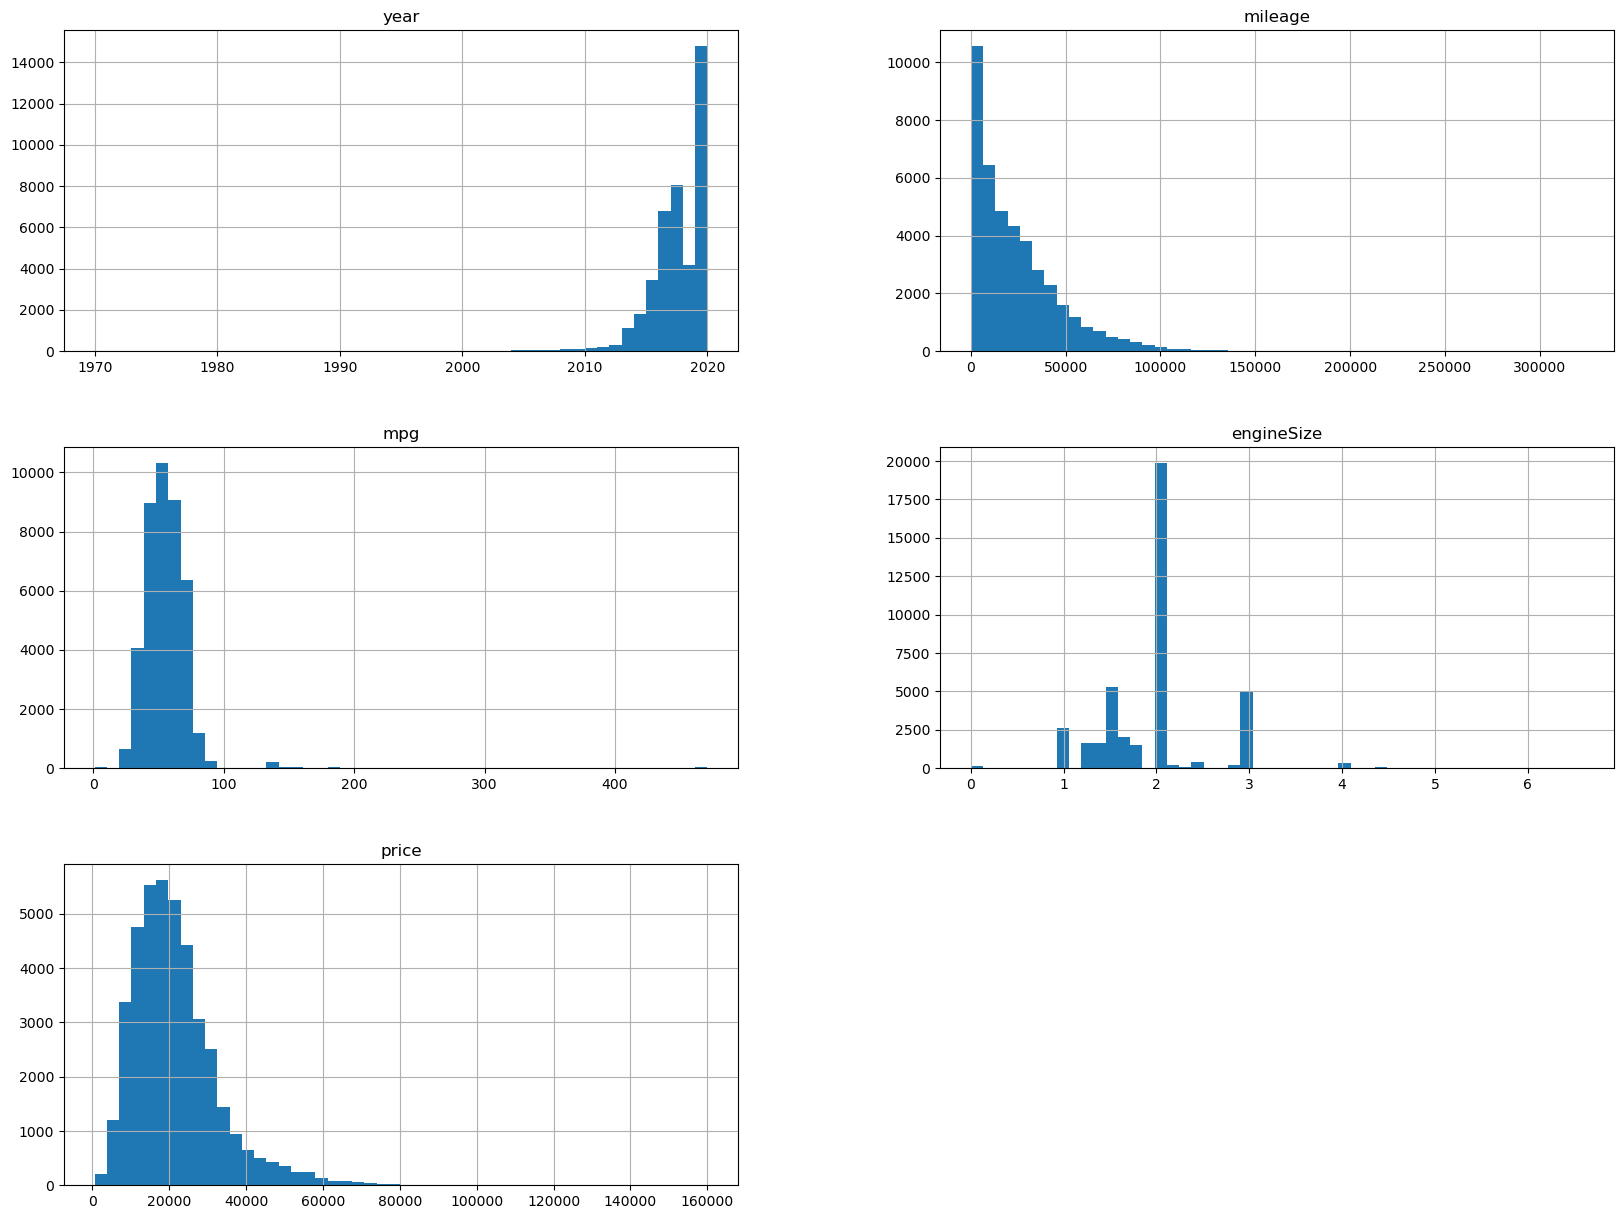

In [17]:
df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='year', ylabel='price'>

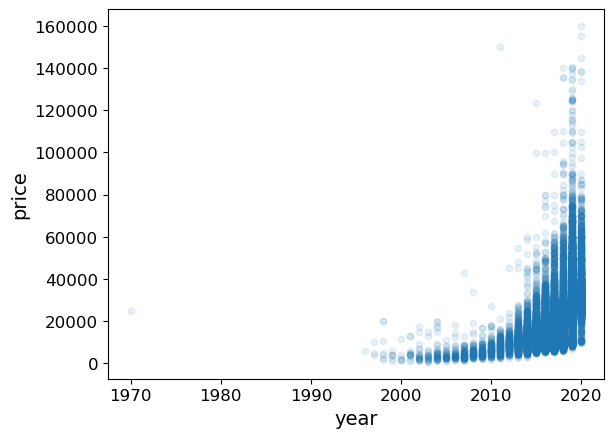

In [ ]:
df.plot(kind="scatter", x="year", y="price", alpha=0.1)

In [ ]:
#df.groupby('model')
df[['model','manufacturer','price']].sort_values('price',ascending= 0).head()

,model,manufacturer,price
34386,G Class,Mercedes,159999
38231,G Class,Mercedes,154998
28192,SL CLASS,Mercedes,149948
4783,R8,Audi,145000
36924,A Class,Mercedes,140319


In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,year,mileage,mpg,engineSize,price
year,1.000000,-0.756008,-0.118543,-0.037192,0.541183
mileage,-0.756008,1.000000,0.163415,0.061405,-0.495734
mpg,-0.118543,0.163415,1.000000,-0.331060,-0.334003
engineSize,-0.037192,0.061405,-0.331060,1.000000,0.588228
price,0.541183,-0.495734,-0.334003,0.588228,1.000000


<Axes: xlabel='manufacturer'>

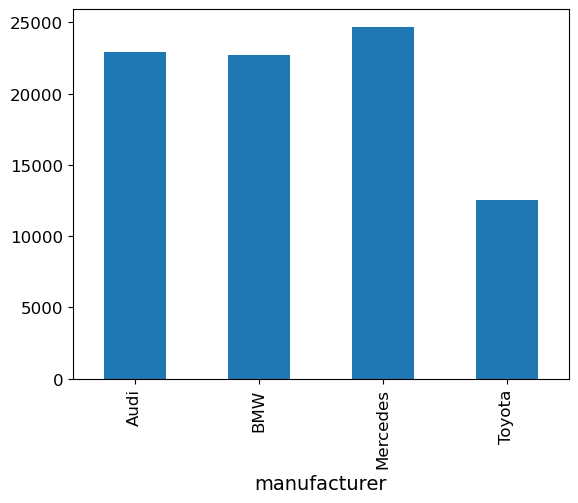

In [ ]:
df.groupby(['manufacturer'])['price'].mean().plot(kind='bar')

In [ ]:
df.columns


Index(['manufacturer', 'model', 'year', 'transmission', 'mileage', 'fuelType',
       'mpg', 'engineSize', 'price'],
      dtype='object')

# Handling categorical data

In [29]:
X = df.copy()
Y = X.pop('price') # this is the target column
features_num = [
   "year", "mileage","mpg", "engineSize"
]
features_cat = [
    "manufacturer","model", "transmission", "fuelType"
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

input_shape = [X_train.shape[1]]

In [53]:
# df.loc[df['fuelType']=='Electric']
# canc = [19043, 19068, 19503]
# riga1 = df_encoded.iloc[19043,]
# riga2 = df_encoded.iloc[19068,]
# riga3 = df_encoded.iloc[19503,]
# df_encoded = df_encoded.drop(canc)

In [26]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming you have X_train, y_train, X_val, Y_val, X_test, Y_test as your datasets

# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor()

# You can perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search = RandomizedSearchCV(estimator=rf_reg, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Mean Squared Error on Validation Set: 5488785.774399256
Cross-Validation Mean Squared Error: 6819339.313531781


NameError: name 'X_test' is not defined

In [31]:
# Train the Random Forest model with the best hyperparameters
best_rf_reg = RandomForestRegressor(n_estimators=100, min_samples_split=5,min_samples_leaf=1,max_depth=None)
best_rf_reg.fit(X_train, Y_train)

# Test the model on the test set
test_predictions = best_rf_reg.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(Y_test, test_predictions)
print(f'Mean Squared Error on Test Set: {mse_test}')
print(f'Root Mean Squared Error on Test Set: {np.sqrt(mse_test)}')


Mean Squared Error on Test Set: 5774386.43991274
Root Mean Squared Error on Test Set: 2402.995305844924
